# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



In [2]:
# TODO: RA & Name
print(f'RA1: 213259 ' + 'Arthur Baia')
print(f'RA2: 200025 ' + 'José Afonso')


RA1: 213259 Arthur Baia
RA2: 200025 José Afonso


## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?




In [64]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("SARESP_train.csv")


e:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [65]:
df


,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,NEC_ESP_4,NEC_ESP_5,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,26270013,JULIO FORTES,B,E,E,E,E,E,E,E,...,NaN,NaN,C,0,41.7,20.8,20.8,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
1,30756614,MESSIAS FREIRE PROFESSOR,B,D,E,C,E,E,E,E,...,NaN,NaN,C,0,83.3,100.0,66.7,Adequado,Avançado,Adequado
2,26014872,JOSE CONTI,B,E,B,D,E,B,D,C,...,NaN,NaN,C,0,58.3,37.5,54.2,Básico,Básico,Básico
3,25739025,NAPOLEAO DE CARVALHO FREIRE PROFESSOR,B,D,E,D,C,E,D,D,...,NaN,NaN,C,0,29.2,29.2,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
4,27363009,RESIDENCIAL BORDON,B,D,E,E,E,E,E,C,...,NaN,NaN,C,0,79.2,41.7,50.0,Adequado,Abaixo do Básico,Básico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120591,28799794,ENNIO CHIESA PROFESSOR,A,E,E,E,E,E,E,E,...,NaN,NaN,C,0,79.2,66.7,83.3,Adequado,Básico,Adequado
120592,27825068,HELIO HELENE,B,D,D,D,D,D,D,D,...,NaN,NaN,C,0,37.5,25.0,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
120593,23873470,ALBERTO SANTOS DUMONT,A,E,E,E,E,E,D,D,...,NaN,NaN,C,0,50.0,37.5,41.7,Básico,Abaixo do Básico,Abaixo do Básico
120594,31376275,FRANCISCO BONFIM,B,E,C,C,D,B,B,A,...,NaN,NaN,C,1,45.8,70.8,54.2,Abaixo do Básico,Básico,Abaixo do Básico


In [ ]:
df.describe


<bound method NDFrame.describe of         CD_ALUNO                                   NOMESC Q1 Q2 Q3 Q4 Q5 Q6  \
0       26270013                             JULIO FORTES  B  E  E  E  E  E   
1       30756614                 MESSIAS FREIRE PROFESSOR  B  D  E  C  E  E   
2       26014872                               JOSE CONTI  B  E  B  D  E  B   
3       25739025    NAPOLEAO DE CARVALHO FREIRE PROFESSOR  B  D  E  D  C  E   
4       27363009                       RESIDENCIAL BORDON  B  D  E  E  E  E   
...          ...                                      ... .. .. .. .. .. ..   
120591  28799794                   ENNIO CHIESA PROFESSOR  A  E  E  E  E  E   
120592  27825068                             HELIO HELENE  B  D  D  D  D  D   
120593  23873470                    ALBERTO SANTOS DUMONT  A  E  E  E  E  E   
120594  31376275                         FRANCISCO BONFIM  B  E  C  C  D  B   
120595  28109335  MAGDALENA SANSEVERINO GROSSO PROFESSORA  A  A  A  A  A  A   

       Q7 Q8  ...

In [ ]:
df.columns


Index(['CD_ALUNO', 'NOMESC', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'RegiaoMetropolitana', 'DE',
       'CODMUN', 'MUN', 'CODESC', 'SERIE_ANO', 'TURMA', 'TP_SEXO',
       'DT_NASCIMENTO', 'PERIODO', 'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3',
       'NEC_ESP_4', 'NEC_ESP_5', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie'],
      dtype='object')

In [ ]:
df.isna().sum(axis=0).sort_values(ascending=False)


NEC_ESP_5           120596
NEC_ESP_4           120595
NEC_ESP_3           120520
NEC_ESP_2           120489
NEC_ESP_1           118206
                     ...  
Q26                      0
Q25                      0
Q24                      0
Q23                      0
nivel_profic_cie         0
Length: 88, dtype: int64

In [71]:
df = pd.read_csv("SARESP_train.csv")

def question_map(df):

    ordinal_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
    inversed_ordinal_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
    dont_know_ordinal_map = {'A': 1, 'B': 2, 'C': 3, 'D': 1, 'E': 2}
    inversed_dont_know_ordinal_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 2} #applied penalty for don't know anwser
    home_ordinal_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
    miss_someone_map = {'A': 1, 'B': 1, 'C': 1, 'D': 0}
    someone_helped_map = {'A': 2, 'B': 1, 'C': 1, 'D': 0}

    for q in range(1, 64):
        if (q <= 8 or (q > 26 and q <= 33) or (q > 33 and q <= 41) or (q > 56 and q <= 58) or q == 60): #ordinal map
            df.replace({f'Q{q}': ordinal_map}, inplace=True)
        elif ((q > 8 and q <= 26) or q == 59):
            df.replace({f'Q{q}': inversed_ordinal_map}, inplace=True) 
        elif (q == 42):
            df.replace({f'Q{q}': inversed_dont_know_ordinal_map}, inplace=True)
        elif (q > 42 and q <= 49):
            df.replace({f'Q{q}': dont_know_ordinal_map}, inplace=True)
        elif (q > 49 and q <= 56):
            df.replace({f'Q{q}': home_ordinal_map}, inplace=True)
        elif (q == 61):
            df.replace({f'Q{q}': miss_someone_map}, inplace=True)
        elif (q == 62):
            df.replace({f'Q{q}': someone_helped_map}, inplace=True)
        else: # 63 question
            print("entrou")
            df = pd.concat([df, pd.get_dummies(df['Q63'], prefix='Q63')], axis=1)
    
    return df

new = question_map(df)
df = new
for i in range(1, 6):
    df.drop(columns=[f'NEC_ESP_{i}'], inplace=True)
df.columns



entrou


Index(['CD_ALUNO', 'NOMESC', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'RegiaoMetropolitana', 'DE',
       'CODMUN', 'MUN', 'CODESC', 'SERIE_ANO', 'TURMA', 'TP_SEXO',
       'DT_NASCIMENTO', 'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C',
       'Q63_D'],
      dtype='object')

In [72]:
# Considerando que as colunas que representam alguma noção geografica e que não há algum 
# indicador socioeconômico nos dados que possa 
df['RegiaoMetropolitana'].groupby(df['RegiaoMetropolitana']).count()

RegiaoMetropolitana
Interior                                                   39211
Região Metropolitana da Baixada Santista                    7688
Região Metropolitana de Campinas                            3465
Região Metropolitana de Ribeirão Preto                      6712
Região Metropolitana de Sorocaba                            6736
Região Metropolitana de São Paulo                          47437
Região Metropolitana do Vale do Paraíba e Litoral Norte     9347
Name: RegiaoMetropolitana, dtype: int64

In [73]:
# Considerando que há varias informações geograficas mas não há nenhum indicador socioeconômico
# usarei apenas a coluna RegiaoMetropolitana, que sintetiza a informação em macro regiões de SP
df = pd.concat([df, pd.get_dummies(df['RegiaoMetropolitana'], prefix='RegiaoMetropolitana')], axis=1)

In [74]:
"""Dropar as colunas NOMESC, MUN, CODESC, CODMUN, RegiaoMetropolitana, Q63, DE"""
df.drop(columns=['NOMESC', 'MUN', 'CODESC', 'CODMUN', 'RegiaoMetropolitana', 'Q63', 'DE'], inplace=True)

In [75]:
df.columns


Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TURMA', 'TP_SEXO', 'DT_NASCIMENTO',
       'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'nivel_profic_lp', 'nivel_profic_mat',
       'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C', 'Q63_D',
       'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMet

In [78]:
df._get_numeric_data().columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'Q63_A', 'Q63_B', 'Q63_C', 'Q63_D',
       'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'RegiaoMetropolitana_Região Metropolitana de São Paulo',
       'RegiaoMetropolitana_Região Met

In [79]:
"""Replace the birth day with the age of the student"""
from datetime import datetime
from datetime import date


def calculate_age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


df['idade'] = df['DT_NASCIMENTO'].apply(calculate_age)
df['idade']


0         18
1         12
2         15
3         18
4         15
          ..
120591    16
120592    13
120593    19
120594    12
120595    17
Name: idade, Length: 120596, dtype: int64

In [80]:
df = df.drop(columns=['DT_NASCIMENTO'])


In [81]:
sex_map = {'F': 0, 'M': 1}
df.replace({'TP_SEXO': sex_map}, inplace=True)


In [82]:
school_turn_map = {'MANHÃ': 0, 'TARDE': 1}
df.replace({'PERIODO': school_turn_map}, inplace=True)


In [83]:
school_year_map = {'EM-3ª série': 3, '9º Ano EF': 2, '5º Ano EF': 1}
df.replace({'SERIE_ANO': school_year_map}, inplace=True)


In [84]:
def get_categorical_columns(df):
    cols = df.columns

    num_cols = df._get_numeric_data().columns

    return list(set(cols) - set(num_cols))

In [85]:
"""Drop column TURMA"""
df = df.drop(columns=['TURMA'])

In [86]:
"""One hot encoding on the columns PERIODO, Tipo_PROVA"""
df = pd.concat([df, pd.get_dummies(df['PERIODO'], prefix='PERIODO')], axis=1)
df = df.drop(columns=['PERIODO'])
df = pd.concat([df, pd.get_dummies(df['Tipo_PROVA'], prefix='Tipo_PROVA')], axis=1)
df = df.drop(columns=['Tipo_PROVA'])


In [88]:
get_categorical_columns(df)

['nivel_profic_mat', 'nivel_profic_lp', 'nivel_profic_cie']

In [89]:
df.shape

(120596, 89)

In [90]:
df.columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TP_SEXO', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C',
       'Q63_D', 'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'Regi

0.00024876446979999335
0.0
0.0


<AxesSubplot:>

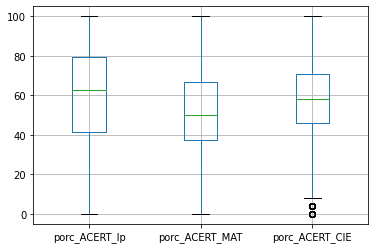

In [104]:
#removing outliers

from scipy import stats

print(len(df[(np.abs(stats.zscore(df['porc_ACERT_CIE'])) > 3)])/len(df.index)) #less than 0.025%
print(len(df[(np.abs(stats.zscore(df['porc_ACERT_MAT'])) > 3)])/len(df.index))
print(len(df[(np.abs(stats.zscore(df['porc_ACERT_lp'])) > 3)])/len(df.index))

df = df.drop(columns=['PERIODO'])
df.boxplot(column=['porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE'])  

In [105]:
df = df[(np.abs(stats.zscore(df['porc_ACERT_CIE'])) < 3)]
df

,CD_ALUNO,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto,RegiaoMetropolitana_Região Metropolitana de Sorocaba,RegiaoMetropolitana_Região Metropolitana de São Paulo,RegiaoMetropolitana_Região Metropolitana do Vale do Paraíba e Litoral Norte,idade,PERIODO_0,PERIODO_1,PERIODO_NOITE,Tipo_PROVA_A,Tipo_PROVA_C
0,26270013,2,5,5,5,5,5,5,5,4,...,0,0,0,1,18,1,0,0,0,1
1,30756614,2,4,5,3,5,5,5,5,5,...,0,0,1,0,12,1,0,0,0,1
2,26014872,2,5,2,4,5,2,4,3,5,...,0,0,0,0,15,1,0,0,0,1
3,25739025,2,4,5,4,3,5,4,4,5,...,0,0,1,0,18,1,0,0,0,1
4,27363009,2,4,5,5,5,5,5,3,5,...,0,0,0,0,15,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120591,28799794,1,5,5,5,5,5,5,5,5,...,0,0,1,0,16,0,1,0,0,1
120592,27825068,2,4,4,4,4,4,4,4,5,...,0,0,1,0,13,1,0,0,0,1
120593,23873470,1,5,5,5,5,5,4,4,5,...,1,0,0,0,19,1,0,0,0,1
120594,31376275,2,5,3,3,4,2,2,1,5,...,1,0,0,0,12,0,1,0,0,1


In [31]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.
def linear_regression(X, y, learning_rate=0.01, epochs=1000):
    """Linear regression using gradient descent using RMSE as loss func."""
    # Initialize weights
    w = np.random.rand(X.shape[1], 1)*0.001 - 0.0005
    b = np.zeros(1, 1)
    # Initialize lists to store loss and weights
    loss = []
    weights = []
    # Iterate over epochs
    for epoch in range(epochs):
        # Compute predictions
        y_pred = np.dot(X, w) + b
        # Compute loss
        loss.append(np.sqrt(np.mean((y - y_pred)**2)))
        # Compute gradients
        dw = -2 * X.T @ (y - y_pred) / X.shape[0]
        db = -2 * np.mean(y - y_pred)
        # Update weights
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # Store weights
        weights.append((w, b))
    return loss, weights

linear_regression()


In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.



> What are the conclusions? (1-2 paragraphs)




2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [ ]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.



3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.


*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.


In [ ]:
*texto em itálico*
> What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)


SyntaxError: invalid syntax (449369750.py, line 1)

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

## Logistic Regression

Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

In [ ]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.


> What are the conclusions? (1-2 paragraphs)


2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.


> What are the conclusions? (1-2 paragraphs)


3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.


> What are the conclusions? (1-2 paragraphs)


## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**